# Binary Tree Visualization

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from IPython.display import clear_output

Загрузим несколько примеров бинарных деревьев

In [ ]:
! wget https://github.com/glebelg/DataVisualization-2021/raw/main/1_binaryTreeVisualization/tree-7n.xml
! wget https://github.com/glebelg/DataVisualization-2021/raw/main/1_binaryTreeVisualization/tree-42n.xml
! wget https://github.com/glebelg/DataVisualization-2021/raw/main/1_binaryTreeVisualization/tree-60n.xml
! wget https://github.com/glebelg/DataVisualization-2021/raw/main/1_binaryTreeVisualization/tree-72n.xml

clear_output()

Для визуализации бинарного дерева реализуем алгоритм layered-tree-draw, который назначит каждой вершине координаты на плоскости

In [ ]:
def ltd(G, root=None, depth=0):
    if root is None:
        root = list(set(edge[0] for edge in G.edges) - set(edge[1] for edge in G.edges))[0]

    children = list(G.neighbors(root))
    assert len(children) <= 2

    # обработаем по отдельности каждный случай: нет потомков, 1 потомок, 2 потомка
    # если встретился лист, то располагаем его в нуле и выводим нулевой контур
    if len(children) == 0:
        pos = {root : (0, depth)}
        return pos, 0, 0
    # если встретился узел с одним потомком, то вызываем от него ltd,
    # присваиваем ему абсциссу потомка и выводим контур поддерева
    elif len(children) == 1:
        pos, left, right = ltd(G, children[0], depth - 1)
        pos[root] = (pos[children[0]][0], depth)
        return pos, left, right
    # если встретился узел с двумя потомками, то вызываем от каждого ltd,
    # сдвигаем правое поддерево до единичной разницы с левым поддеревом,
    # располагаем текущий узел между потомками и выводим контур
    else:
        pos1, left1, right1 = ltd(G, children[0], depth - 1)
        pos2, left2, right2 = ltd(G, children[1], depth - 1)

        shift = right1 - left2 + 1
        pos2_shifted = {k : (v[0] + shift, v[1]) for k, v in pos2.items()}

        pos1.update(pos2_shifted)
        pos1[root] = ((pos1[children[1]][0] + pos1[children[0]][0]) / 2, depth)
    return pos1, left1, right1 + right2 + 1


Визуализируем примеры графов по координатам, полученных с помощью алгоритма layered-tree-draw

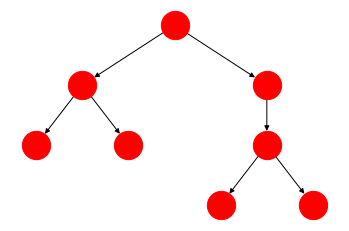

In [ ]:
G = nx.read_graphml('tree-7n.xml')

pos, _, _ = ltd(G)

f = plt.figure()
nx.draw(G, pos=pos, node_color='red', node_size=800, ax=f.add_subplot(111))
f.savefig("tree-7n.png")

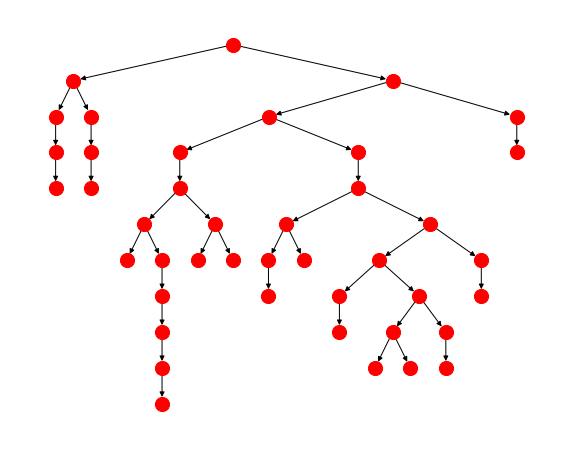

In [ ]:
G = nx.read_graphml('tree-42n.xml')

pos, _, _ = ltd(G)

f = plt.figure(figsize=(10, 8))
nx.draw(G, pos=pos, node_color='red', node_size=200, ax=f.add_subplot(111))
f.savefig("tree-42n.png")

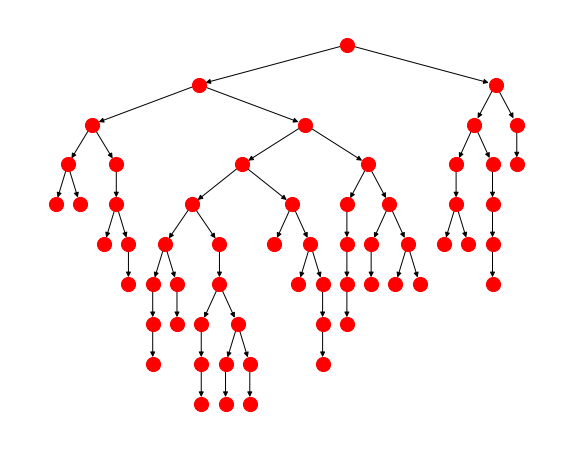

In [ ]:
G = nx.read_graphml('tree-60n.xml')

pos, _, _ = ltd(G)

f = plt.figure(figsize=(10, 8))
nx.draw(G, pos=pos, node_color='red', node_size=200, ax=f.add_subplot(111))
f.savefig("tree-60n.png")

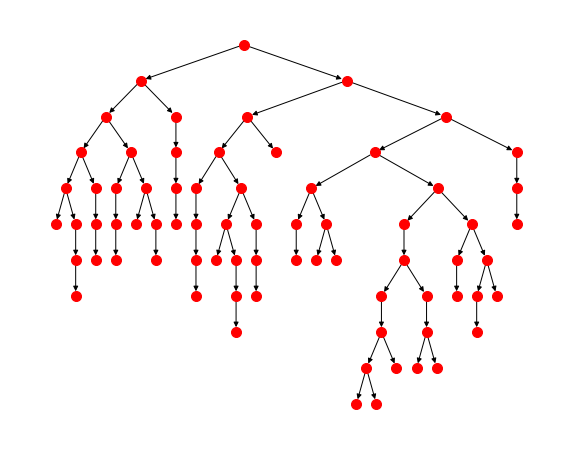

In [ ]:
G = nx.read_graphml('tree-72n.xml')

pos, _, _ = ltd(G)

f = plt.figure(figsize=(10, 8))
nx.draw(G, pos=pos, node_color='red', node_size=100, ax=f.add_subplot(111))
f.savefig("tree-72n.png")